In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(1)$$\begin{equation}
\Phi_{L} = \frac{1}{2} v_{0}^{2} ln(R_{c}^{2} + R^{2} + \frac{z^{2}}{q_{\phi}^{2}}) + constant
\end{equation}$$

(2)$$\begin{equation}
\rho_{L}(R,z) = \frac{v_{0}^{2}}{4\pi Gq_{\phi}^{2}} \frac{(2q_{\phi}^{2} + 1)R_{c}^{2} + R^{2} + (2-q_{\phi}^{-2})z^{2}}{(R_{c}^{2} + R^{2} + z^{2}q_{\phi}^{-2})^{2}}
\end{equation}$$

tomando $q_{\phi} = q$

(3)$$\begin{equation}
(\Phi_{L} - constant)\frac{2}{v_{0}^{2}} - 2ln R_{c} = ln(1 + (\frac{R}{R_c})^{2} + (\frac{z}{qR_{c}})^{2})
\end{equation}$$

(4)$$\begin{equation}
\frac{R_{c}^{2} 4\pi G q^{2} \rho_{L}}{v_{0}^{2}} = \frac{2q^{2} + 1 + (R/R_{c})^{2} + (2-q^{2})(z/R_{c})^{2}}{(1 + (R/R_{c})^{2} + (z/qR_{c})^{2})^{2}}
\end{equation}$$

tomaremos valores de $q_{\phi} = 0.95$ y $q_{\phi} = 0.7$

In [3]:
#funcion para calcular el potencial (3) adimencional
def potencial_ad(R,z,R_c,q):
    phi_ad = np.log(1. + (R/R_c)**2. + (z/(q*R_c))**2.)
    return phi_ad

In [4]:
R = np.linspace(-30.,30.,100)
z = np.linspace(-30.,30.,100)
G = 4.302e-6#kpc/SM(km/s)^2

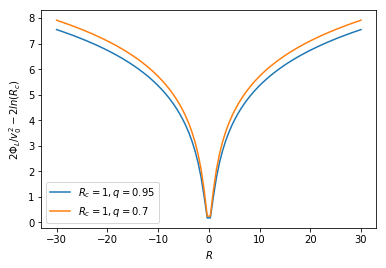

In [5]:
plt.plot(R, potencial_ad(R,z,R_c=1.,q=0.95),label=r'$R_{c} = 1, q = 0.95$')
plt.plot(R, potencial_ad(R,z,R_c=1.,q=0.7),label=r'$R_{c} = 1, q = 0.7$')
plt.xlabel(r'$R$')
plt.ylabel(r'$2\Phi_{L}/v_{0}^{2} - 2ln(R_{c})$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

In [6]:
#funcion para calcular la densidad adimencional (4)
def densidad_ad(R,z,R_c,q):
    n = 2.*q**2. + 1.+ (R/R_c)**2. + (2.-q**2.)*(z/R_c)**2.
    d = (1+(R/R_c)**2.+(z/(q*R_c))**2.)**2.
    rho_ad = n/d
    return rho_ad

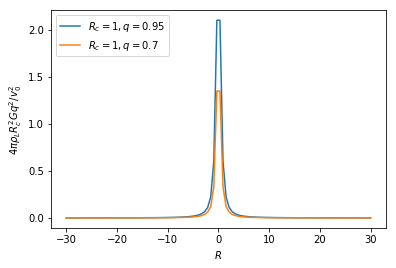

In [7]:
plt.plot(R, densidad_ad(R,z,R_c=1.,q=0.95),label=r'$R_{c} = 1, q = 0.95$')
plt.plot(R, densidad_ad(R,z,R_c=1.,q=0.7),label=r'$R_{c} = 1, q = 0.7$')
plt.xlabel(r'$R$')
plt.ylabel(r'$4\pi\rho_{L} R_{c}^{2}Gq^{2}/v_{0}^{2}$')
plt.legend(loc='upper left', prop={'size':10})
plt.show()

In [8]:
def potencial(R,z,R_c,q,v_0,C):
    K = 0.5*v_0**2.
    n = potencial_ad(R,z,R_c,q) + 2.*np.log(R_c)
    phi = K*n + C
    return phi

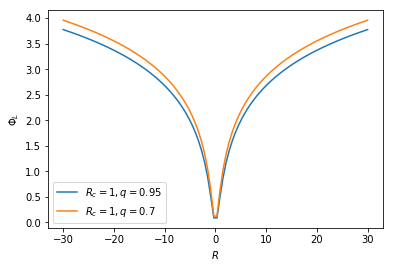

In [9]:
plt.plot(R, potencial(R,z,R_c=1.,q=0.95,v_0 = 1.,C=0.),label=r'$R_{c} = 1, q = 0.95$')
plt.plot(R, potencial(R,z,R_c=1.,q=0.7, v_0 = 1.,C=0.),label=r'$R_{c} = 1, q = 0.7$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\Phi_{L}$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

In [10]:
def densidad(R,z,R_c,q,v_0):
    K = v_0**2./(4.*np.pi*G*q**2. * R_c**2.)
    rho = K*densidad_ad(R,z,R_c,q)
    return rho

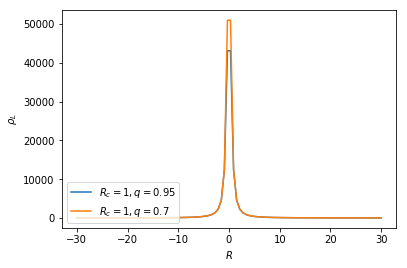

In [11]:
plt.plot(R, densidad(R,z,R_c=1.,q=0.95,v_0 = 1.),label=r'$R_{c} = 1, q = 0.95$')
plt.plot(R, densidad(R,z,R_c=1.,q=0.7, v_0 = 1.),label=r'$R_{c} = 1, q = 0.7$')
plt.xlabel(r'$R$')
plt.ylabel(r'$\rho_{L}$')
plt.legend(loc='lower left', prop={'size':10})
plt.show()

In [13]:
R_1,z_1 = np.meshgrid(R,z)

In [50]:
print np.min(densidad_ad(R_1,z_1,R_c=1.,q=0.95)),np.max(densidad_ad(R_1,z_1,R_c=1.,q=0.95))

0.0005246765918366728 2.10414322052694


In [47]:
print np.log10(10.75),np.log10(43126.85)

1.0314084642516241 4.63474773828559


In [15]:
import seaborn as sb

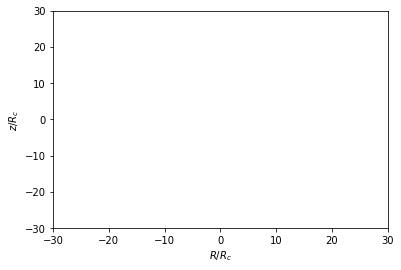

In [49]:
R_c=1.
levels=np.linspace(np.log10(10.75),np.log10(43126.85),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1/R_c,z_1/R_c,rho_L(R_1,z_1,q=0.95,R_c=1.,v_0=1.),levels=levels)
xlabel(r'$R/R_{c}$')
ylabel(r'$z/R_{c}$')
#plt.title(r'$a = 1, b=1$')
#plt.colorbar(lm)
plt.savefig('LogarithmicEquipotentialq095.pdf')

In [35]:
print np.min(densidad_ad(R_1,z_1,R_c=1.,q=0.7)),np.max(densidad_ad(R_1,z_1,R_c=1.,q=0.7))

0.0003017134484426664 1.6074546706297026


Text(0,0.5,'$z/R_{c}$')

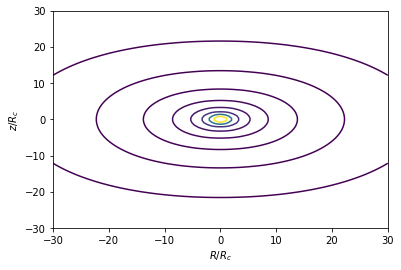

In [38]:
levels=10**np.linspace(np.log10(0.0003),np.log10(1.607),10)
fig, ax = plt.subplots()
lm = ax.contour(R_1,z_1,densidad_ad(R_1,z_1,R_c=1.,q=0.7),levels=levels)
xlabel(r'$R/R_{c}$')
ylabel(r'$z/R_{c}$')
#plt.title(r'$a = 1, b=1$')
#plt.xlim(-10,10)
#plt.ylim(-6,6)
#plt.colorbar(lm)
plt.savefig('LogarithmicEquipotentialq07.pdf')